<a href="https://colab.research.google.com/github/DivaniJane/Machine-Learning-Rock-Scissor-Paper/blob/main/Submission_ML_Divani_Jane_Forinda_Putri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip\
  -O /content/rockpaperscissors.zip

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
os.listdir('/content/rockpaperscissors')

In [ ]:
os.listdir('/content/rockpaperscissors/train')

In [ ]:
!rm -rf /content/rockpaperscissors/train/.ipynb_checkpoints

In [ ]:
os.listdir('/content/rockpaperscissors/val')

In [ ]:
pip install split_folders

In [ ]:
import splitfolders
base_dir = '/content/rockpaperscissors/rps-cv-images'
train_dir = os.path.join('/content/rockpaperscissors', 'train')
validation_dir = os.path.join('/content/rockpaperscissors', 'val')
splitfolders.ratio(base_dir, output = '/content/rockpaperscissors', seed = 1337, ratio = (.6, .4) )

In [ ]:
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [ ]:
# memisahkan direktori
from sklearn.model_selection import train_test_split

train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4) 
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4) 
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [ ]:
train_rock = os.path.join(train_dir, 'rock') 
train_paper = os.path.join(train_dir, 'paper') 
train_scissors = os.path.join(train_dir, 'scissors') 
val_rock = os.path.join(validation_dir, 'rock') 
val_paper = os.path.join(validation_dir, 'paper') 
val_scissors = os.path.join(validation_dir, 'scissors')

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 20,
                    horizontal_flip = True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
test_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 20,
                    horizontal_flip = True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
      train_dir,
      target_size = (150, 150),
      batch_size = 32,
      class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
      validation_dir,
      target_size = (150, 150),
      batch_size = 32,
      class_mode = 'categorical' #karena 
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch = 25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data = validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps = 5,  # berapa batch yang akan dieksekusi pada setiap epoch)
      verbose=2)

Epoch 1/20
25/25 - 56s - loss: 1.0118 - accuracy: 0.5138 - val_loss: 0.9179 - val_accuracy: 0.6438 - 56s/epoch - 2s/step
Epoch 2/20
25/25 - 54s - loss: 0.5227 - accuracy: 0.8087 - val_loss: 0.3653 - val_accuracy: 0.8750 - 54s/epoch - 2s/step
Epoch 3/20
25/25 - 54s - loss: 0.2659 - accuracy: 0.9000 - val_loss: 0.4414 - val_accuracy: 0.8250 - 54s/epoch - 2s/step
Epoch 4/20
25/25 - 54s - loss: 0.2333 - accuracy: 0.9187 - val_loss: 0.3051 - val_accuracy: 0.8813 - 54s/epoch - 2s/step
Epoch 5/20
25/25 - 53s - loss: 0.2116 - accuracy: 0.9200 - val_loss: 0.3442 - val_accuracy: 0.9125 - 53s/epoch - 2s/step
Epoch 6/20
25/25 - 53s - loss: 0.2152 - accuracy: 0.9337 - val_loss: 0.1749 - val_accuracy: 0.9312 - 53s/epoch - 2s/step
Epoch 7/20
25/25 - 53s - loss: 0.1296 - accuracy: 0.9600 - val_loss: 0.1930 - val_accuracy: 0.9312 - 53s/epoch - 2s/step
Epoch 8/20
25/25 - 53s - loss: 0.1556 - accuracy: 0.9500 - val_loss: 0.1060 - val_accuracy: 0.9750 - 53s/epoch - 2s/step
Epoch 9/20
25/25 - 53s - loss: 0

Saving 4z7r8yUDFk3HwEgN.png to 4z7r8yUDFk3HwEgN.png
4z7r8yUDFk3HwEgN.png
scissors


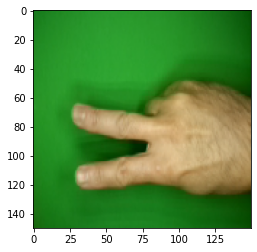

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  classes = model.predict(images, batch_size=10)
print(fn)
if classes[0][0]==1:
    print('paper')
elif classes[0][1]==1:
    print('rock')
elif classes[0][2]==1:
    print('scissors')